In [1]:
import os
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cbook
import csv 
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Preprocess the data set

In [2]:
data = pd.read_csv('/Users/Anthony/Desktop/AudioProjet/musical_genres_classification/data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00093.wav,0.377690,0.065906,569.930721,995.407125,927.427725,0.021701,-350.436188,169.545746,31.820370,...,1.821690,-5.970891,-5.259567,-0.229211,-1.776850,-3.713751,0.181591,2.072390,-2.896225,blues
1,blues.00087.wav,0.336773,0.158098,1442.190271,1870.534155,3083.414688,0.050889,-155.504929,125.638863,1.596553,...,-0.792893,-7.748057,0.413548,-7.030263,3.997679,-6.256611,0.958227,2.019821,-5.742188,blues
2,blues.00050.wav,0.400860,0.182380,1945.848425,2082.246626,4175.874749,0.085806,-82.979019,107.052124,-25.320452,...,12.539581,-9.762303,2.562253,-6.300853,2.996785,-8.718455,-0.326581,-2.980347,0.712600,blues
3,blues.00044.wav,0.390212,0.136276,2279.124558,2375.102120,5198.360233,0.092570,-109.509285,86.922409,-8.607986,...,11.087481,-5.085794,3.976360,-12.859742,12.343859,0.026216,-0.741568,-5.126620,3.303442,blues
4,blues.00078.wav,0.414188,0.258052,2333.685108,2227.425609,4942.811778,0.123863,-2.524338,101.252716,-33.924385,...,12.506609,-13.368823,6.112817,-9.065890,5.033774,-11.330276,3.166534,-4.567591,-4.033623,blues


In [3]:
#  We delete unnecessary fields
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.377690,0.065906,569.930721,995.407125,927.427725,0.021701,-350.436188,169.545746,31.820370,16.682835,...,1.821690,-5.970891,-5.259567,-0.229211,-1.776850,-3.713751,0.181591,2.072390,-2.896225,blues
1,0.336773,0.158098,1442.190271,1870.534155,3083.414688,0.050889,-155.504929,125.638863,1.596553,45.804523,...,-0.792893,-7.748057,0.413548,-7.030263,3.997679,-6.256611,0.958227,2.019821,-5.742188,blues
2,0.400860,0.182380,1945.848425,2082.246626,4175.874749,0.085806,-82.979019,107.052124,-25.320452,57.124989,...,12.539581,-9.762303,2.562253,-6.300853,2.996785,-8.718455,-0.326581,-2.980347,0.712600,blues
3,0.390212,0.136276,2279.124558,2375.102120,5198.360233,0.092570,-109.509285,86.922409,-8.607986,64.494560,...,11.087481,-5.085794,3.976360,-12.859742,12.343859,0.026216,-0.741568,-5.126620,3.303442,blues
4,0.414188,0.258052,2333.685108,2227.425609,4942.811778,0.123863,-2.524338,101.252716,-33.924385,41.516888,...,12.506609,-13.368823,6.112817,-9.065890,5.033774,-11.330276,3.166534,-4.567591,-4.033623,blues


### Create data set : train set ,  test set and validation set

In [4]:
# We import scikit-learn libraries for  preparing data set
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode type as integer : blues -> 0, classical -> 1, etc  
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

# Normalized data set
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

# Randomly divide training set , test set and valisation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15)

print(X_train.shape[0], X_train.shape[1])

680 26


## DNN

### Crate Model 

In [5]:
# We import TF libraries for learning
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# We define the network architecture
model = models.Sequential()

# dense layer
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# output layer
model.add(layers.Dense(10, activation='softmax'))


### Funcion for displaying the accuracy 

In [6]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
    """
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

### Compile, train, and evaluate the model DNN

Epoch 1/30
22/22 [==============================] - 0s 21ms/step - loss: 1.9707 - accuracy: 0.3500 - val_loss: 1.5000 - val_accuracy: 0.5000
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 1.3518 - accuracy: 0.5059 - val_loss: 1.3500 - val_accuracy: 0.5500
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 1.0888 - accuracy: 0.6250 - val_loss: 1.2108 - val_accuracy: 0.6000
Epoch 4/30
22/22 [==============================] - 0s 5ms/step - loss: 0.9859 - accuracy: 0.6441 - val_loss: 1.2484 - val_accuracy: 0.5750
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 0.8711 - accuracy: 0.6897 - val_loss: 1.2033 - val_accuracy: 0.6167
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.7280 - accuracy: 0.7574 - val_loss: 1.1685 - val_accuracy: 0.6167
Epoch 7/30
22/22 [==============================] - 0s 6ms/step - loss: 0.6368 - accuracy: 0.7794 - val_loss: 1.2370 - val_accuracy: 0.5667
Epoch 8/30
22/22 [=

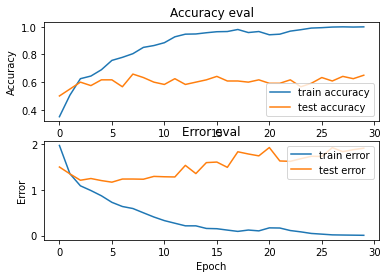

In [7]:
sgd = optimizers.Adam()
model.compile(sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    validation_data=(X_validation, y_validation),
                    epochs = 30, 
                    batch_size = 32)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:',test_acc)
plot_history(history)

## LSTM

### Crate Model 

In [8]:
from keras.utils import np_utils

# Reshape data set for LSTM
X_train = X_train.reshape( X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_validation= X_validation.reshape(X_validation.shape[0], 1, X_validation.shape[1])


In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_test shape:', X_validation.shape)

X_train shape: (680, 1, 26)
X_test shape: (200, 1, 26)
X_test shape: (120, 1, 26)


In [10]:
model = models.Sequential()
# 2 LSTM layers
model.add(layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(layers.LSTM(64))

# dense layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

# output layer
model.add(layers.Dense(10, activation='softmax'))

### Compile, train, and evaluate the model DNN

In [11]:
optimiser = optimizers.Adam(learning_rate=0.0001)    
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             23296     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 61,130
Trainable params: 61,130
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
22/22 [==============================] - 1s 47ms/step - loss: 2.2983 - accuracy: 0.1765 - val_loss: 2.2976 - val_accuracy: 0.1583
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 2.2938 - accuracy: 0.1971 - val_loss: 2.2927 - val_accuracy: 0.2083
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 2.2886 - accuracy: 0.2250 - val_loss: 2.2878 - val_accuracy: 0.2417
Epoch 4/500
22/22 [==============================] - 0s 6ms/step - loss: 2.2831 - accuracy: 0.2706 - val_loss: 2.2819 - val_accuracy: 0.3167
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 2.2748 - accuracy: 0.2868 - val_loss: 2.2750 - val_accuracy: 0.3583
Epoch 6/500
22/22 [==============================] - 0s 6ms/step - loss: 2.2670 - accuracy: 0.3015 - val_loss: 2.2672 - val_accuracy: 0.3750
Epoch 7/500
22/22 [==============================] - 0s 6ms/step - loss: 2.2574 - accuracy: 0.3015 - val_loss: 2.2579 - val_accuracy: 0.4000
Epoch 8/500


Epoch 59/500
22/22 [==============================] - 0s 5ms/step - loss: 1.5483 - accuracy: 0.4103 - val_loss: 1.5740 - val_accuracy: 0.4083
Epoch 60/500
22/22 [==============================] - 0s 5ms/step - loss: 1.5453 - accuracy: 0.3809 - val_loss: 1.5690 - val_accuracy: 0.4167
Epoch 61/500
22/22 [==============================] - 0s 6ms/step - loss: 1.5293 - accuracy: 0.4221 - val_loss: 1.5641 - val_accuracy: 0.4167
Epoch 62/500
22/22 [==============================] - 0s 5ms/step - loss: 1.5328 - accuracy: 0.4250 - val_loss: 1.5597 - val_accuracy: 0.4167
Epoch 63/500
22/22 [==============================] - 0s 5ms/step - loss: 1.5124 - accuracy: 0.4265 - val_loss: 1.5554 - val_accuracy: 0.4167
Epoch 64/500
22/22 [==============================] - 0s 6ms/step - loss: 1.5089 - accuracy: 0.4206 - val_loss: 1.5494 - val_accuracy: 0.4167
Epoch 65/500
22/22 [==============================] - 0s 5ms/step - loss: 1.5060 - accuracy: 0.4456 - val_loss: 1.5430 - val_accuracy: 0.4250
Epoch 

22/22 [==============================] - 0s 6ms/step - loss: 1.0037 - accuracy: 0.6426 - val_loss: 1.3243 - val_accuracy: 0.5500
Epoch 174/500
22/22 [==============================] - 0s 5ms/step - loss: 1.0297 - accuracy: 0.6456 - val_loss: 1.3256 - val_accuracy: 0.5500
Epoch 175/500
22/22 [==============================] - 0s 5ms/step - loss: 0.9959 - accuracy: 0.6456 - val_loss: 1.3244 - val_accuracy: 0.5583
Epoch 176/500
22/22 [==============================] - 0s 6ms/step - loss: 0.9988 - accuracy: 0.6574 - val_loss: 1.3251 - val_accuracy: 0.5583
Epoch 177/500
22/22 [==============================] - 0s 7ms/step - loss: 0.9927 - accuracy: 0.6515 - val_loss: 1.3246 - val_accuracy: 0.5667
Epoch 178/500
22/22 [==============================] - 0s 14ms/step - loss: 1.0031 - accuracy: 0.6544 - val_loss: 1.3249 - val_accuracy: 0.5500
Epoch 179/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0030 - accuracy: 0.6544 - val_loss: 1.3257 - val_accuracy: 0.5583
Epoch 180/50

22/22 [==============================] - 0s 11ms/step - loss: 0.7310 - accuracy: 0.7471 - val_loss: 1.3144 - val_accuracy: 0.5500
Epoch 288/500
22/22 [==============================] - 0s 8ms/step - loss: 0.7248 - accuracy: 0.7441 - val_loss: 1.3125 - val_accuracy: 0.5417
Epoch 289/500
22/22 [==============================] - 0s 8ms/step - loss: 0.7185 - accuracy: 0.7588 - val_loss: 1.3078 - val_accuracy: 0.5667
Epoch 290/500
22/22 [==============================] - 0s 7ms/step - loss: 0.7124 - accuracy: 0.7441 - val_loss: 1.3109 - val_accuracy: 0.5667
Epoch 291/500
22/22 [==============================] - 0s 7ms/step - loss: 0.7100 - accuracy: 0.7515 - val_loss: 1.3154 - val_accuracy: 0.5500
Epoch 292/500
22/22 [==============================] - 0s 7ms/step - loss: 0.6958 - accuracy: 0.7559 - val_loss: 1.3214 - val_accuracy: 0.5500
Epoch 293/500
22/22 [==============================] - 0s 7ms/step - loss: 0.7170 - accuracy: 0.7529 - val_loss: 1.3175 - val_accuracy: 0.5500
Epoch 294/50

22/22 [==============================] - 0s 21ms/step - loss: 0.5266 - accuracy: 0.8235 - val_loss: 1.4321 - val_accuracy: 0.5917
Epoch 402/500
22/22 [==============================] - 0s 6ms/step - loss: 0.5048 - accuracy: 0.8471 - val_loss: 1.4308 - val_accuracy: 0.5917
Epoch 403/500
22/22 [==============================] - 0s 10ms/step - loss: 0.4898 - accuracy: 0.8397 - val_loss: 1.4299 - val_accuracy: 0.5917
Epoch 404/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4979 - accuracy: 0.8382 - val_loss: 1.4341 - val_accuracy: 0.6000
Epoch 405/500
22/22 [==============================] - 1s 24ms/step - loss: 0.4885 - accuracy: 0.8456 - val_loss: 1.4327 - val_accuracy: 0.5917
Epoch 406/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4948 - accuracy: 0.8471 - val_loss: 1.4436 - val_accuracy: 0.5917
Epoch 407/500
22/22 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.8338 - val_loss: 1.4487 - val_accuracy: 0.5917
Epoch 408/

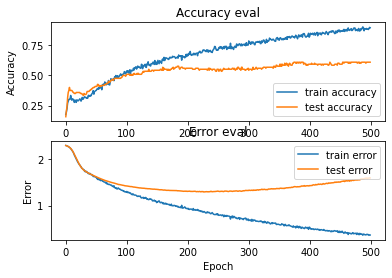

In [12]:
history_lstm = model.fit(X_train,
                          y_train,
                          validation_data=(X_validation, y_validation),
                          batch_size=32,
                          epochs=500,
                         )
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
# plot accuracy/error for training and validation
plot_history(history_lstm)